## ProjectDS Recruitment Challenge Shoes
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_parquet("data/transactions.parquet")
df.head()


,Shop,Order_Date_FK,ProductCode,OriginalSaleAmountInclVAT,CustomerID,SaleDocumentNumber,Returned,RevenueInclVAT,CostPriceExclVAT,BrandName,ModelGroup,ProductGroup
0,36,20210730,-1968361059464632550,99.95,-2190786785520839526,23995792,0,74.96,36.534515,3694837121284491212,3162564956579801398,-453682476182549203
1,58,20210730,-1745497788861904687,21.95,-3499949798555834600,23995794,0,21.95,7.364523,-1657270726128381662,-6715310361529623819,-453682476182549203
2,49,20210730,-4482110002029860032,69.95,-7841417233849937172,23995797,0,38.47,24.415000,-7202472198306336051,-248459121805647149,5294166889150293396
3,49,20210730,-9146072753857637799,99.95,-7841417233849937172,23995797,0,54.97,32.293506,-2074012670196538378,-248459121805647149,5294166889150293396
4,15,20210730,-8829485741699345914,49.95,7033964597104594686,23995798,0,17.48,8.885632,-4869459690934553786,-4124706989267335995,-453682476182549203


In [20]:
df.Shop.nunique()

85

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759889 entries, 0 to 1759888
Data columns (total 12 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Shop                       int64  
 1   Order_Date_FK              int64  
 2   ProductCode                int64  
 3   OriginalSaleAmountInclVAT  float64
 4   CustomerID                 int64  
 5   SaleDocumentNumber         int64  
 6   Returned                   int64  
 7   RevenueInclVAT             float64
 8   CostPriceExclVAT           float64
 9   BrandName                  int64  
 10  ModelGroup                 int64  
 11  ProductGroup               int64  
dtypes: float64(3), int64(9)
memory usage: 161.1 MB


In [5]:
df[
    [
        "Shop",
        "ProductCode",
        "CustomerID",
        "SaleDocumentNumber",
        "BrandName",
        "ModelGroup",
        "ProductGroup",
    ]
] = df[
    [
        "Shop",
        "ProductCode",
        "CustomerID",
        "SaleDocumentNumber",
        "BrandName",
        "ModelGroup",
        "ProductGroup",
    ]
].astype("string")
df["Order_Date_FK"] = pd.to_datetime(df["Order_Date_FK"], format="%Y%m%d")
df["Returned"] = df["Returned"].astype("bool")
df["Month"] = df["Order_Date_FK"].dt.month
df["Day"] = df["Order_Date_FK"].dt.day
df["Weekday"] = df["Order_Date_FK"].dt.weekday

df["Order_Date_FK"] = df["Order_Date_FK"].dt.date

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759889 entries, 0 to 1759888
Data columns (total 15 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Shop                       string 
 1   Order_Date_FK              object 
 2   ProductCode                string 
 3   OriginalSaleAmountInclVAT  float64
 4   CustomerID                 string 
 5   SaleDocumentNumber         string 
 6   Returned                   bool   
 7   RevenueInclVAT             float64
 8   CostPriceExclVAT           float64
 9   BrandName                  string 
 10  ModelGroup                 string 
 11  ProductGroup               string 
 12  Month                      int32  
 13  Day                        int32  
 14  Weekday                    int32  
dtypes: bool(1), float64(3), int32(3), object(1), string(7)
memory usage: 169.5+ MB


In [6]:
df.head(10)

,Shop,Order_Date_FK,ProductCode,OriginalSaleAmountInclVAT,CustomerID,SaleDocumentNumber,Returned,RevenueInclVAT,CostPriceExclVAT,BrandName,ModelGroup,ProductGroup,Month,Day,Weekday
0,36,2021-07-30,-1968361059464632550,99.95,-2190786785520839526,23995792,False,74.96,36.534515,3694837121284491212,3162564956579801398,-453682476182549203,7,30,4
1,58,2021-07-30,-1745497788861904687,21.95,-3499949798555834600,23995794,False,21.95,7.364523,-1657270726128381662,-6715310361529623819,-453682476182549203,7,30,4
2,49,2021-07-30,-4482110002029860032,69.95,-7841417233849937172,23995797,False,38.47,24.415000,-7202472198306336051,-248459121805647149,5294166889150293396,7,30,4
3,49,2021-07-30,-9146072753857637799,99.95,-7841417233849937172,23995797,False,54.97,32.293506,-2074012670196538378,-248459121805647149,5294166889150293396,7,30,4
4,15,2021-07-30,-8829485741699345914,49.95,7033964597104594686,23995798,False,17.48,8.885632,-4869459690934553786,-4124706989267335995,-453682476182549203,7,30,4
5,15,2021-07-30,9221523181585526717,59.95,7033964597104594686,23995798,False,44.96,16.994261,-1657270726128381662,-4124706989267335995,-453682476182549203,7,30,4
6,15,2021-07-30,9221523181585526717,59.95,7033964597104594686,23995798,False,44.96,16.994261,-1657270726128381662,-4124706989267335995,-453682476182549203,7,30,4
7,57,2021-07-30,-6530540459055041583,65.95,-1349381670501476147,23995799,False,65.95,22.771382,2610152986705088844,-4124706989267335995,-453682476182549203,7,30,4
8,57,2021-07-30,6539704214262416149,65.95,-1349381670501476147,23995799,False,65.95,25.978618,2610152986705088844,-4124706989267335995,-453682476182549203,7,30,4
9,57,2021-07-30,-5153674324768068994,65.95,-1349381670501476147,23995799,False,36.27,20.090000,33538854880025124,-4124706989267335995,-453682476182549203,7,30,4


In [7]:
df.Returned.value_counts()

Returned
False    1692094
True       67795
Name: count, dtype: int64

In [8]:
print(df.ModelGroup.nunique())
print(df.ProductGroup.nunique())
print(df.BrandName.nunique())


32
6
649


---
### Duplicates
---

In [39]:
print(f"df shape= {df.shape}")
df_dup = df[df.duplicated(keep="last")]
print(f"df_dup shape= {df_dup.shape} - \n n unique duplicates = \n{df_dup.nunique()}")
df_dup2 = df_dup.drop_duplicates()
print(f"df_dup shape= {df_dup2.shape} - \n n unique duplicates = \n{df_dup2.nunique()}")
print(f"{len(df_dup)-len(df_dup2)} duplicates removed")


df shape= (1759889, 15)
df_dup shape= (816535, 15) - 
 n unique duplicates = 
Shop                             85
Order_Date_FK                    76
ProductCode                   21425
OriginalSaleAmountInclVAT       284
CustomerID                   310257
SaleDocumentNumber           491547
Returned                          2
RevenueInclVAT                 8077
CostPriceExclVAT              16352
BrandName                       605
ModelGroup                       32
ProductGroup                      6
Month                             3
Day                              31
Weekday                           7
dtype: int64
df_dup shape= (782328, 15) - 
 n unique duplicates = 
Shop                             85
Order_Date_FK                    76
ProductCode                   21425
OriginalSaleAmountInclVAT       284
CustomerID                   310257
SaleDocumentNumber           491547
Returned                          2
RevenueInclVAT                 8077
CostPriceExclVAT           

26398335


---
### Model Group
---

In [9]:
df_model = df[["ModelGroup", "Returned"]]


              ModelGroup  TrueCount  TotalCount  Ratio (%)
23   3162564956579801398      30586      564852       5.41
11  -4124706989267335995      26310      703042       3.74
13  -6715310361529623819       2857       64497       4.43
1   -1330987452709117740       1534       38580       3.98
5    -248459121805647149       1494       71818       2.08


Text(0, 0.5, 'Percentage of Returned Products')

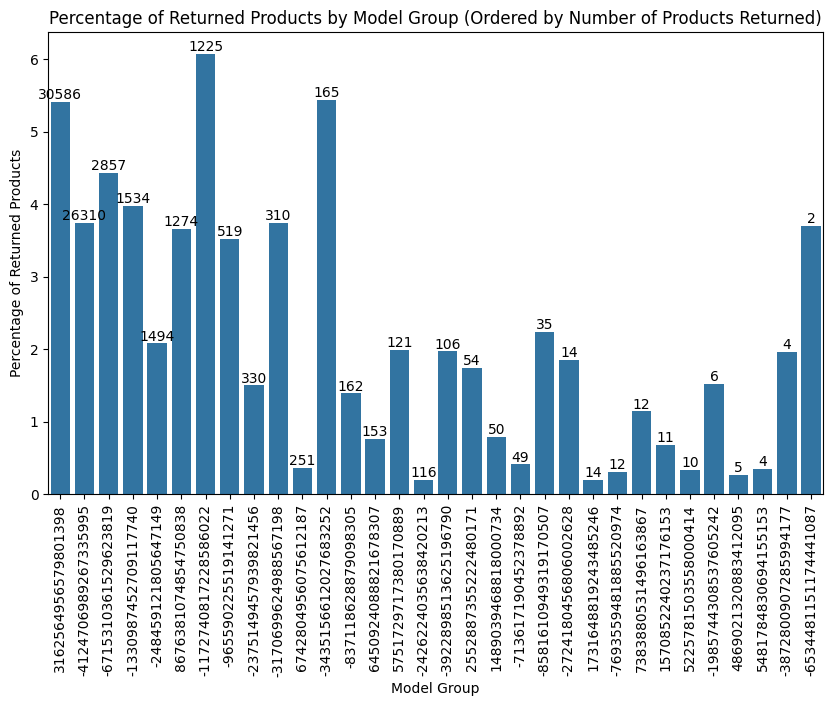

In [10]:
# Ratios of returned products

dfModelGroup = (
    df.groupby(["ModelGroup", "Returned"])["RevenueInclVAT"].count().reset_index()
)
dfModelCount = (
    dfModelGroup.groupby("ModelGroup")["RevenueInclVAT"]
    .sum()
    .reset_index()
    .rename(columns={"RevenueInclVAT": "TotalCount"})
)

dfModelGroup["TrueCount"] = dfModelGroup["RevenueInclVAT"]
dfModelGroup = dfModelGroup[dfModelGroup["Returned"] == True].reset_index(drop=True)

dfModelGroup = pd.merge(dfModelGroup, dfModelCount, on="ModelGroup", how="left")
dfModelGroup["Ratio (%)"] = np.round(
    dfModelGroup["TrueCount"] / dfModelGroup["TotalCount"] * 100, 2
)
dfModelGroup = dfModelGroup.drop(columns=["Returned", "RevenueInclVAT"]).sort_values(
    by="TrueCount", ascending=False
)


print(dfModelGroup.head())


plt.figure(figsize=(10, 6))
ax = sns.barplot(x="ModelGroup", y="Ratio (%)", data=dfModelGroup)
ax.bar_label(
    ax.containers[0], labels=dfModelGroup["TrueCount"], label_type="edge", fontsize=10
)
plt.xticks(rotation=90)
plt.title(
    "Percentage of Returned Products by Model Group (Ordered by Number of Products Returned)"
)
plt.xlabel("Model Group")
plt.ylabel("Percentage of Returned Products")


Text(0, 0.5, 'Percentage of Returned Products')

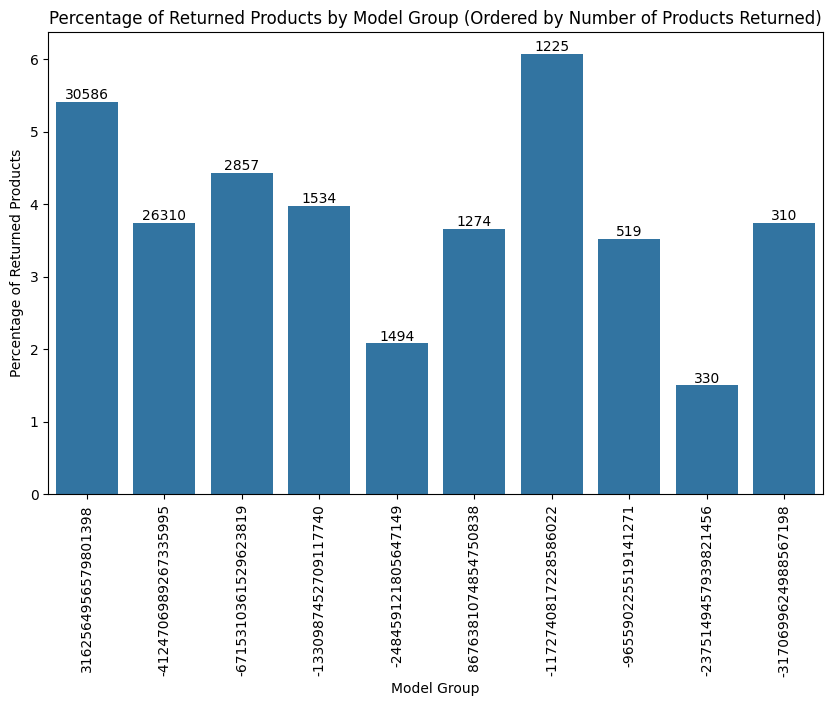

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="ModelGroup", y="Ratio (%)", data=dfModelGroup.head(10))
ax.bar_label(
    ax.containers[0],
    labels=dfModelGroup["TrueCount"].head(10),
    label_type="edge",
    fontsize=10,
)
plt.xticks(rotation=90)
plt.title(
    "Percentage of Returned Products by Model Group (Ordered by Number of Products Returned)"
)
plt.xlabel("Model Group")
plt.ylabel("Percentage of Returned Products")


In [17]:
dfCorr = df.copy()
dfCorr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759889 entries, 0 to 1759888
Data columns (total 15 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Shop                       string 
 1   Order_Date_FK              object 
 2   ProductCode                string 
 3   OriginalSaleAmountInclVAT  float64
 4   CustomerID                 string 
 5   SaleDocumentNumber         string 
 6   Returned                   bool   
 7   RevenueInclVAT             float64
 8   CostPriceExclVAT           float64
 9   BrandName                  string 
 10  ModelGroup                 string 
 11  ProductGroup               string 
 12  Month                      int32  
 13  Day                        int32  
 14  Weekday                    int32  
dtypes: bool(1), float64(3), int32(3), object(1), string(7)
memory usage: 169.5+ MB


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, '-1172740817228586022'),
  Text(1, 0, '-1330987452709117740'),
  Text(2, 0, '-1985744308537605242'),
  Text(3, 0, '-2375149457939821456'),
  Text(4, 0, '-2426224035638420213'),
  Text(5, 0, '-248459121805647149'),
  Text(6, 0, '-2724180456806002628'),
  Text(7, 0, '-3170699624988567198'),
  Text(8, 0, '-3435156612027683252'),
  Text(9, 0, '-3872800907285994177'),
  Text(10, 0, '-3922898513625196790'),
  Text(11, 0, '-4124706989267335995'),
  Text(12, 0, '-6534481151174441087'),
  Text(13, 0, '-6715310361529623819'),
  Text(14, 0, '-713617190452378892'),
  Text(15, 0, '-7693559481885520974'),
  Text(16, 0, '-837118628879098305'),
  Text(17, 0, '-8581610949319170507'),
  Text(18, 0, '-965590225519141271'),
  Text(19, 0, '1489039468818000734'),
  Text(20, 0, '1570852240237176153'),
  Text(21, 0, 

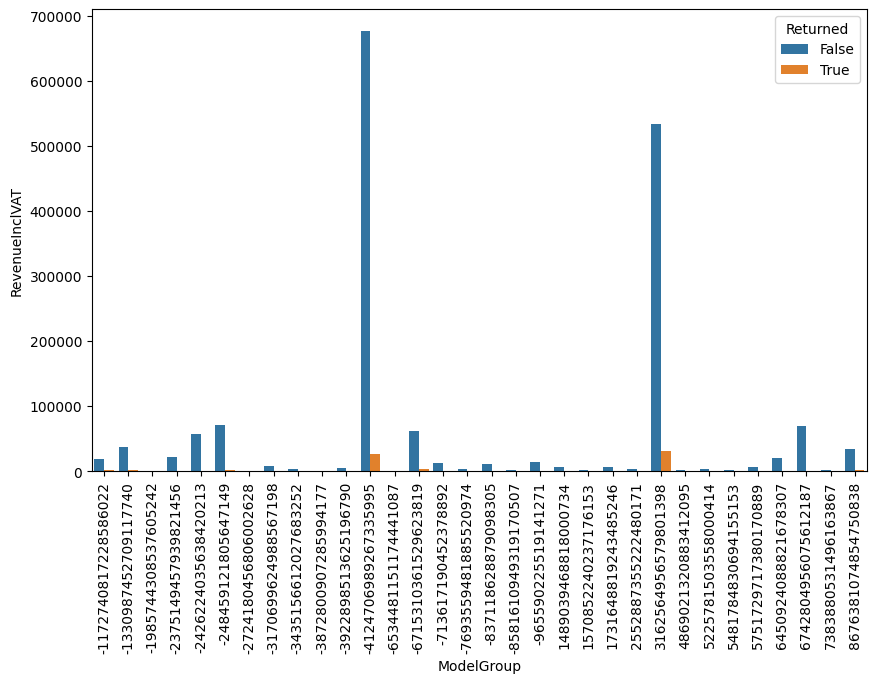

In [13]:
dfModelGroup = (
    df.groupby(["ModelGroup", "Returned"])["RevenueInclVAT"].count().reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(
    dfModelGroup, x="ModelGroup", y="RevenueInclVAT", hue="Returned", errorbar=None
)
plt.xticks(rotation=90)


### Product Group
---

           ProductGroup  TrueCount  TotalCount  Ratio (%)
0   -453682476182549203      63196     1408919       4.49
3   5294166889150293396       1990      102672       1.94
2   2500932515802331300       1619       44621       3.63
4   5965103661511607192        440       91825       0.48
1  -5386210342051699146        376       76074       0.49


Text(0, 0.5, 'Percentage of Returned Products')

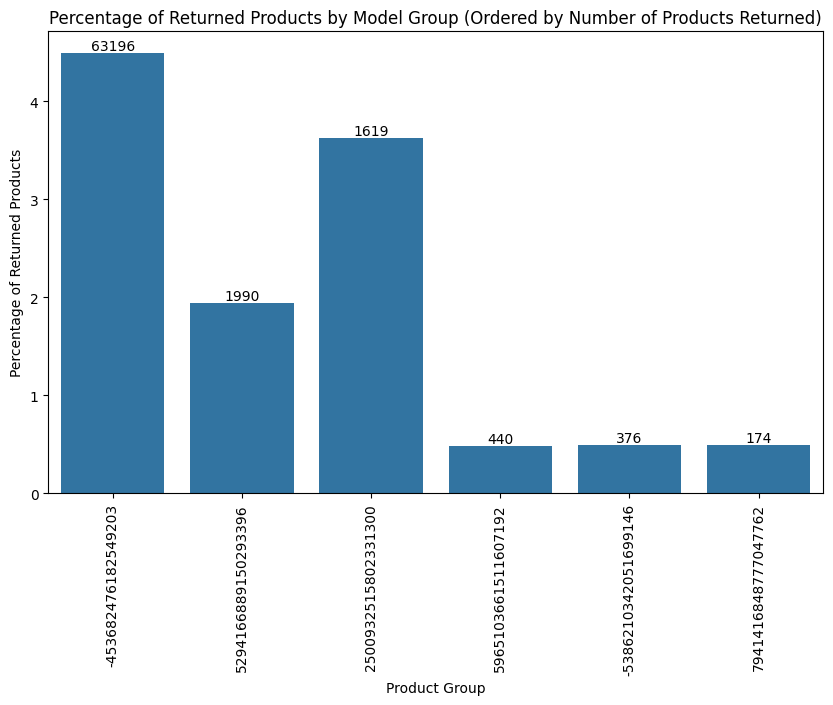

In [19]:
# Ratios of returned products

dfProductGroup = (
    df.groupby(["ProductGroup", "Returned"])["RevenueInclVAT"].count().reset_index()
)
dfProductCount = (
    dfProductGroup.groupby("ProductGroup")["RevenueInclVAT"]
    .sum()
    .reset_index()
    .rename(columns={"RevenueInclVAT": "TotalCount"})
)

dfProductGroup["TrueCount"] = dfProductGroup["RevenueInclVAT"]
dfProductGroup = dfProductGroup[dfProductGroup["Returned"] == True].reset_index(
    drop=True
)

dfProductGroup = pd.merge(dfProductGroup, dfProductCount, on="ProductGroup", how="left")
dfProductGroup["Ratio (%)"] = np.round(
    dfProductGroup["TrueCount"] / dfProductGroup["TotalCount"] * 100, 2
)
dfProductGroup = dfProductGroup.drop(
    columns=["Returned", "RevenueInclVAT"]
).sort_values(by="TrueCount", ascending=False)


print(dfProductGroup.head())


plt.figure(figsize=(10, 6))
ax = sns.barplot(x="ProductGroup", y="Ratio (%)", data=dfProductGroup)
ax.bar_label(
    ax.containers[0], labels=dfProductGroup["TrueCount"], label_type="edge", fontsize=10
)
plt.xticks(rotation=90)
plt.title(
    "Percentage of Returned Products by Model Group (Ordered by Number of Products Returned)"
)
plt.xlabel("Product Group")
plt.ylabel("Percentage of Returned Products")
